In [1]:
from keras.datasets import imdb
import numpy as np
from keras import optimizers
from keras import losses
from keras import metrics 
from keras.models import Sequential
from keras.layers import Dense

print(np.__version__)

Using TensorFlow backend.


1.16.2


In [2]:
(train_data, train_labels) , (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
print(train_data.shape)
print(train_labels.shape)

(25000,)
(25000,)


In [4]:
word_index = imdb.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reversed_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

print(train_data.shape)
print(train_data[0])

(25000, 10000)
[0. 1. 1. ... 0. 0. 0.]


In [9]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu',input_shape = (10000,)))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 1, activation='sigmoid'))
model.compile(optimizer= optimizers.RMSprop(), loss=losses.binary_crossentropy, metrics=['acc'])

In [10]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [11]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.5344 - acc: 0.7746 - val_loss: 0.3943 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.3181 - acc: 0.8973 - val_loss: 0.3277 - val_acc: 0.8713
Epoch 3/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2343 - acc: 0.9245 - val_loss: 0.2862 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.1844 - acc: 0.9400 - val_loss: 0.2745 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1526 - acc: 0.9509 - val_loss: 0.2996 - val_acc: 0.8806
Epoch 6/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1225 - acc: 0.9625 - val_loss: 0.2882 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 1s 91us/step - loss: 

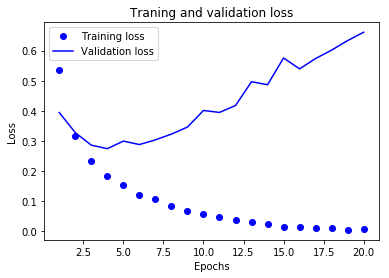

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Traning and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

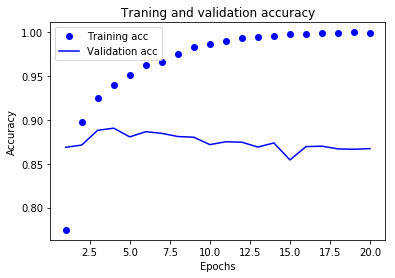

In [14]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Traning and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()